# Mohammed VI Polytechnic University
## TP1 - Optimizing Memory Access
#### February 13, 2025

##### Done by : Yassir Fri

This notebook covers the following exercises:

1. **Exercise 1**: Measuring the impact of memory access strides on performance in C.
2. **Exercise 2**: Standard matrix multiplication vs. loop-reordered (optimized) multiplication.
3. **Exercise 3**: Blocked (tiled) matrix multiplication and finding the optimal block size.

Each exercise is implemented as a separate C file. Bash cells are used to write the source code, compile (with different optimization flags where applicable) and run the executables.

## Exercise 1: Impact of Memory Access Strides

In this exercise, we explore how traversing an array with different strides impacts the performance. The C program allocates an array of doubles, initializes each element to 1.0, and then computes a summation while varying the stride. 

The program is compiled twice:

- With **-O0** (no optimization)
- With **-O2** (level 2 optimization, including loop unrolling and instruction scheduling)

The output shows the stride, computed sum, time taken (in msec) and the effective memory bandwidth (in MB/s).

Below you will find a Bash cell that creates the file `stride.c`, compiles it with both optimization flags, and runs the executable.

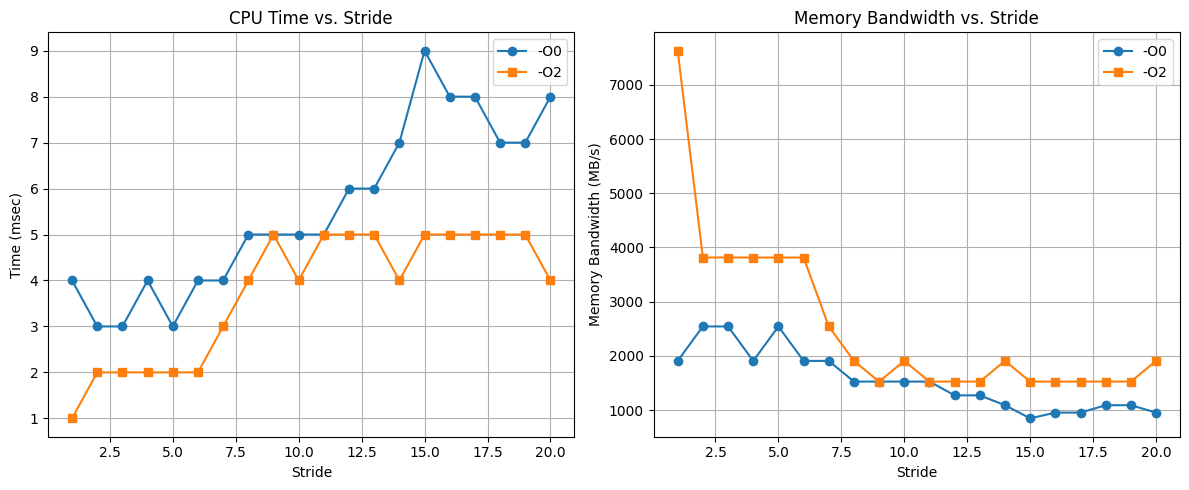

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    """
    Reads a CSV file with columns:
      stride, sum, time (msec), rate (MB/s)
    and returns the data as a NumPy array.
    """
    return np.loadtxt(filename, delimiter=',')

def main():
    data_o0 = read_data("o0.txt")
    data_o2 = read_data("o2.txt")
    
    stride_o0 = data_o0[:, 0]
    time_o0   = data_o0[:, 2]
    rate_o0   = data_o0[:, 3]
    
    stride_o2 = data_o2[:, 0]
    time_o2   = data_o2[:, 2]
    rate_o2   = data_o2[:, 3]
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(stride_o0, time_o0, 'o-', label="-O0")
    plt.plot(stride_o2, time_o2, 's-', label="-O2")
    plt.xlabel("Stride")
    plt.ylabel("Time (msec)")
    plt.title("CPU Time vs. Stride")
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(stride_o0, rate_o0, 'o-', label="-O0")
    plt.plot(stride_o2, rate_o2, 's-', label="-O2")
    plt.xlabel("Stride")
    plt.ylabel("Memory Bandwidth (MB/s)")
    plt.title("Memory Bandwidth vs. Stride")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


##### Interpretation


In this exercise, the impact of memory access strides on performance is investigated. The experiment demonstrates that as the stride increases, the CPU time increases while the effective memory bandwidth decreases. This is primarily due to reduced cache utilization — accessing elements with larger strides causes the CPU to fetch data that is not contiguous in memory, resulting in more cache misses. Moreover, comparing the results between the `-O0` (no optimization) and `-O2` (optimized) compilations reveals how compiler optimizations (such as loop unrolling and instruction scheduling) can mitigate, but not completely overcome, the drawbacks of non-contiguous memory access. This emphasizes the importance of writing cache-friendly code to achieve better performance.


## Exercise 2: Matrix Multiplication – Standard vs. Loop Reordering

In this exercise, we implement the standard matrix multiplication using three nested loops:

```c
for (int i = 0; i < n; i++)
  for (int j = 0; j < n; j++)
    for (int k = 0; k < n; k++)
      c[i][j] += a[i][k] * b[k][j];
```

Then, we change the loop order (to a `jk` ordering) to better utilize the cache and improve performance. 

The Bash cell below creates two source files (`mxm_standard.c` and `mxm_optimized.c`), compiles them and prints their execution times.

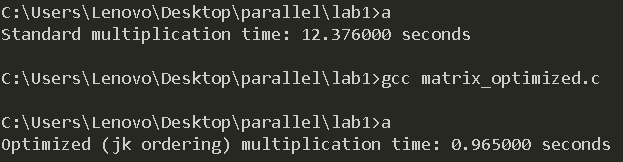

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\Lenovo\Desktop\parallel\lab1\Screenshot 2025-02-13 150715.png')

##### Interpretation

This exercise compares standard matrix multiplication with an optimized version that reorders the loops. The standard implementation follows the straightforward triple-nested loop approach. In contrast, the loop-reordered (or optimized) version rearranges the loops (for example, using a `jk` ordering) to improve data locality. This reordering allows the inner loops to operate on data that is more likely to reside in the cache, reducing cache misses and thus improving performance. The performance differences observed between these two approaches underline the importance of exploiting the memory hierarchy — a crucial aspect of high-performance computing.



## Exercise 3: Block Matrix Multiplication

In this exercise, we implement a block (or tiled) matrix multiplication. Blocking is used to better exploit the cache by operating on submatrices (blocks) rather than individual elements. 

The code below creates a file `mxm_bloc.c` that:

- Divides the matrices into blocks of size `B x B` (the block size can be passed as a command-line argument).
- Performs the multiplication on these blocks.
- Measures the CPU time and computes a memory bandwidth approximation.

Compile this file with:

```bash
gcc -O2 -o mxm_block mxm_bloc.c
```

Then run with various block sizes (e.g., `./mxm_block 16`, `./mxm_block 32`, etc.) to determine the optimal block size.

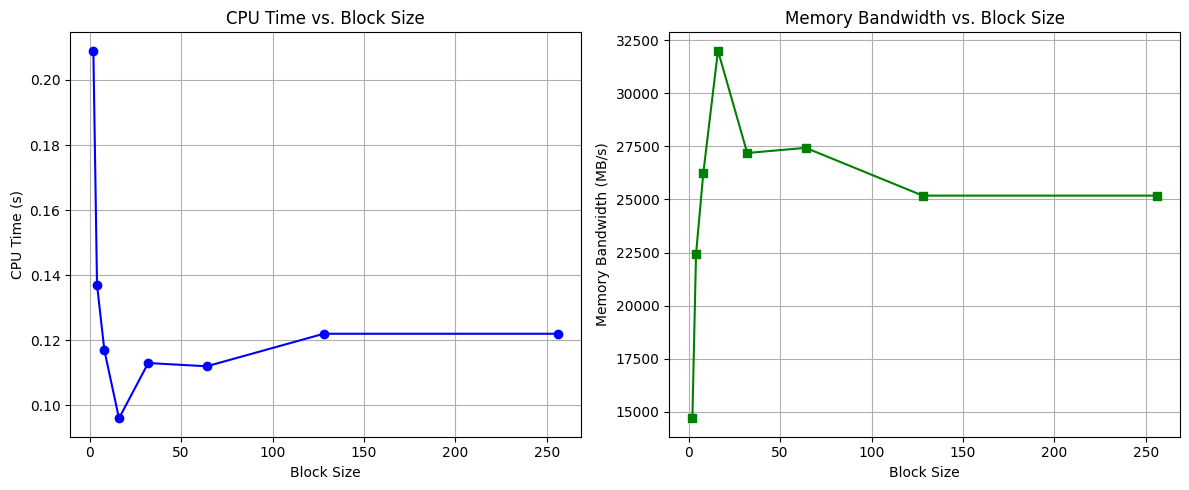

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    data = np.loadtxt('matrix.txt', delimiter=',', skiprows=1)
    block_sizes = data[:, 0]
    times = data[:, 1]
    bandwidths = data[:, 2]
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(block_sizes, times, 'o-', color='blue')
    plt.xlabel("Block Size")
    plt.ylabel("CPU Time (s)")
    plt.title("CPU Time vs. Block Size")
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(block_sizes, bandwidths, 's-', color='green')
    plt.xlabel("Block Size")
    plt.ylabel("Memory Bandwidth (MB/s)")
    plt.title("Memory Bandwidth vs. Block Size")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


In Exercise 3, block (or tiled) matrix multiplication is implemented to optimize performance further. By dividing the matrices into smaller blocks, the algorithm can operate on submatrices that fit into the cache, thereby reducing the overhead caused by frequent memory accesses. Running the executable with different block sizes helps in identifying an optimal block size — one where the CPU time is minimized and the memory bandwidth is maximized. This exercise illustrates the trade-off inherent in blocking: while a block size that is too small can lead to excessive overhead, one that is too large may not effectively utilize the cache. Finding the optimal block size is thus essential for maximizing performance in matrix computations.
